In [1]:
#library to ignore error
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

In [3]:
amazon_data = pd.read_excel("Amazon.xlsx")
amazon_data.head(3)

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams


In [4]:
#shape of dataframe
amazon_data.shape

(1597, 27)

In [5]:
#importing stopwords from nltkcorpus
from nltk.corpus import stopwords

In [18]:
stopword =  list(set(stopwords.words("english")))

# i dont want "amazon" ,"use" word in our reviews that does not make any sense so will add to our stop word list
stopword.extend(["amazon","use","like","great"])

In [19]:
new_amazon = amazon_data[["reviews.text"]]

In [20]:
#converting everything into lower case latetr and removing special character

new_amazon["clean_reviews"] = new_amazon["reviews.text"].str.lower().str.replace("[^a-z ]","")
new_amazon.head()

,reviews.text,clean_reviews
0,I initially had trouble deciding between the p...,i initially had trouble deciding between the p...
1,Allow me to preface this with a little history...,allow me to preface this with a little history...
2,I am enjoying it so far. Great for reading. Ha...,i am enjoying it so far great for reading had ...
3,I bought one of the first Paperwhites and have...,i bought one of the first paperwhites and have...
4,I have to say upfront - I don't like coroporat...,i have to say upfront i dont like coroporate ...


In [21]:
#clean reviews
print(new_amazon.clean_reviews[0])

#original reviews
print(amazon_data["reviews.text"][0])

i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyagefortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have  ppi so the  dollar jump turns out pricey the voyages page press isnt always sensitive and if you are fine with a specific setting you dont need auto light adjustmentits been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case its not hard to change the setting either as youll only be changing the light level at a certain time of day not every now and then while readingalso glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have if i used a thi

In [22]:
#creating a function which will remove all the stop words from the text

def remove_stop_word(text):
    text = [word for word in text.split() if word not in stopword]
    return " ".join(text)

In [23]:
#applying above stopword remove function on the column clean_reviews

new_amazon["without_stop_word"] = new_amazon.clean_reviews.apply(remove_stop_word)

In [24]:
#clean reviews
print(new_amazon.clean_reviews[0])
print("\n\n")

#text after removing stop words
print(new_amazon.without_stop_word[0])

i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyagefortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have  ppi so the  dollar jump turns out pricey the voyages page press isnt always sensitive and if you are fine with a specific setting you dont need auto light adjustmentits been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case its not hard to change the setting either as youll only be changing the light level at a certain time of day not every now and then while readingalso glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have if i used a thi

In [25]:
#importing countvector from sklearn featureextraction
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
# create a countvector object

# min_dif = 0.02---->which apear less than 2 % will not be considered
# max_dif = 0.9 ---->which appear more than 90 % will not be considered
vec = CountVectorizer(min_df=0.02,max_df=0.90)

vec.fit(new_amazon["without_stop_word"])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=0.02,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [27]:
#create DTM matrix

matrix = vec.fit_transform(new_amazon["without_stop_word"])
matrix

<1597x790 sparse matrix of type '<class 'numpy.int64'>'
	with 70163 stored elements in Compressed Sparse Row format>

In [28]:
#creating a dataframe where each word will be column and count will be rows
DTM = pd.DataFrame(matrix.toarray(),columns=vec.get_feature_names())
DTM.head(3)

,ability,able,absolutely,access,accidental,according,account,accurate,actually,add,...,worth,would,wouldnt,write,year,years,yes,yet,youre,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Top 3 words from the amzon reviews

In [29]:
#calculating the word frequency

word_freq = DTM.sum()

#sort them descending order

word_freq.sort_values(ascending=False).head(3)  # Top 3 words from the amzon reviews

kindle        1499
fire          1389
headphones     780
dtype: int64

# -------------------------------

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
#creating the stopwords columns into a paragraph

sent = " ".join(new_amazon.without_stop_word)

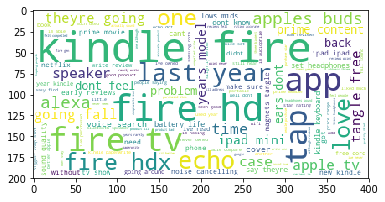

In [32]:
wc = WordCloud(max_font_size=50,background_color="white").generate(sent)
plt.imshow(wc)

# ========================END===============================